# Process HPPC Starting SOC

11/1/2021

Question to answer: how much of the initial variability in measured cell 5% SOC resistance is due to differences in the way SOC is defined during the HPPC charge curve?

The way to think about it: a lot of our work centers around this "metric at 5% SOC". The results would clearly be impacted by the definition of "5% SOC". Each cell has a slightly different starting capacity. Consider the fact that fast formation cells had on average ~20mAh less capacity, which is ~0.8% in capacity. This percentage difference in capacity will also translate into a difference in the SOC definition. Thus, 5% SOC could be 5 * (0.992, 1.008) % SOC, depending on what capacity you choose for the normalization. In our work, we defined SOC for each cell based on the total charge capacity during the HPPC charge sequence.

Suppose we used another definition of SOC, e.g. by normalizing to the nominal capacity of the cell of 2.37 Ah. In this case, suppose we carry up to a 0.8% offset. A linearization of the electrode stoichiometry model around 5% SOC (~100mAh) shows that dR/dQ = 7/20 = 0.35 m$\Omega$/mAh. With a 0.8% offset at 5% SOC, we get dR = 0.35 * 100 mAh * 0.008 = 0.28 $\Omega$.

In conclusion, the error we expect due to definitional differences in SOC is 0.28 m$\Omega$. Since the measured resistance range of samples is between 42 and 52 m$\Omega$, the SOC definition contribution to the error is small.

To be thorough, we will investigate, in this notebook, what is the starting voltage $V_0$ for the very first HPPC charge pulse (what's the point? I'm not exactly sure actually. Just curious to see how different $V_0$ could be.)

In [2]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob, re, pprint, random

from matplotlib import pyplot as plt

from src.formation import FormationCell
from src.utils import get_label_registry

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure plot settings
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Helvetica'],
                  'size': 26
                  })
plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (10, 8)
                    })
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=True)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')
plt.rc('image',  cmap='gray')

DPI = 600
VOLTAGE_LIMITS = (2.95, 4.25)
CAPACITY_LIMITS = (0, 3)

ORANGE = (1, 0.5, 0)
BLUE = (0, 0.5, 1)
BLACK = (0.0, 0.0, 0.0)
GREEN = (0, 0.75, 0)
ORANGE = (1, 0.5, 0)

In [87]:
cellnum = np.arange(1, 41)

data_list = []
is_baseline_formation_list = []
is_room_temp_list = []
v0_list = []
vf_list = []

for id in cellnum:
    
    if id == 9:
        continue
        
    print(f'Processing cell {id}')

    cell = FormationCell(id)
    
    data = cell.process_diagnostic_hppc_discharge_data()
    
    raw_pulses = data[0]['raw_pulses']

    raw_pulses_sub = raw_pulses[raw_pulses['voltage_0_v'] == np.min(raw_pulses['voltage_0_v'])]

    data_list.append(data)
    is_baseline_formation_list.append(cell.is_baseline_formation())
    is_room_temp_list.append(cell.is_room_temp())
    
    vf_list.append(raw_pulses_sub.iloc[-1]['voltage_v'])
    v0_list.append(raw_pulses_sub.iloc[-1]['voltage_0_v'])


Processing cell 1
Processing cell 2
Processing cell 3
Processing cell 4
Processing cell 5
Processing cell 6
Processing cell 7
Processing cell 8
Processing cell 10
Processing cell 11
Processing cell 12
Processing cell 13
Processing cell 14
Processing cell 15
Processing cell 16
Processing cell 17
Processing cell 18
Processing cell 19
Processing cell 20
Processing cell 21
Processing cell 22
Processing cell 23
Processing cell 24
Processing cell 25
Processing cell 26
Processing cell 27
Processing cell 28
Processing cell 29
Processing cell 30
Processing cell 31
Processing cell 32
Processing cell 33
Processing cell 34
Processing cell 35
Processing cell 36
Processing cell 37
Processing cell 38
Processing cell 39
Processing cell 40


In [ ]:
#

Text(0, 0.5, 'Voltage (V)')

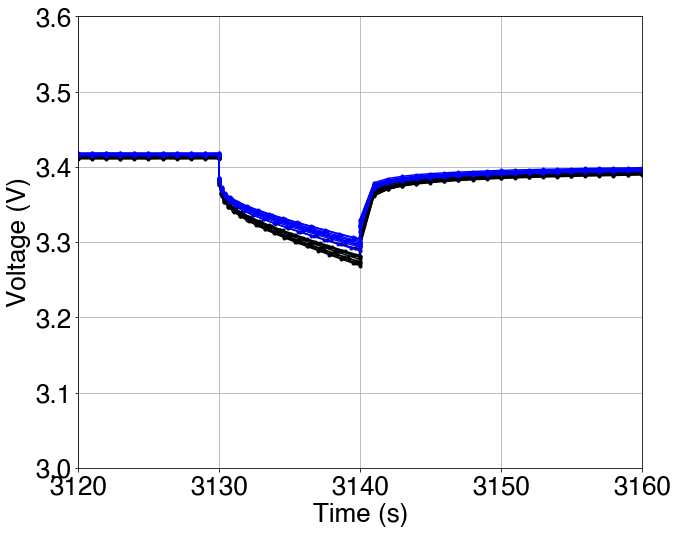

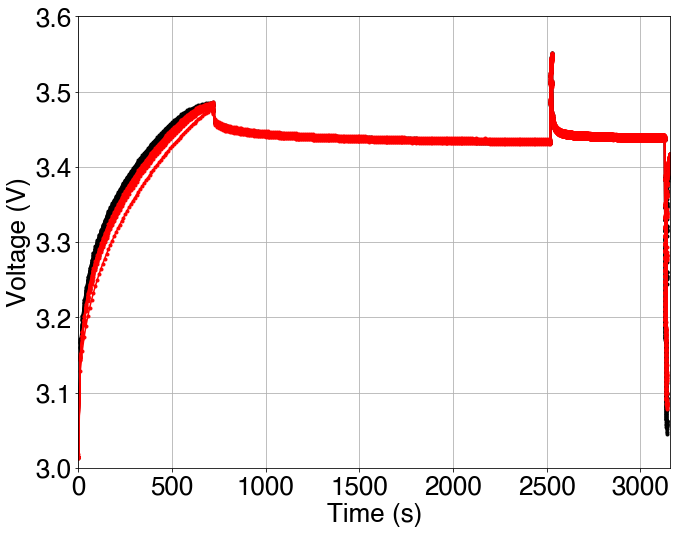

In [94]:
plt.figure()

for data, is_baseline, is_room_temp in zip(data_list, is_baseline_formation_list,
                                          is_room_temp_list):
    col = 'k' if is_baseline else 'b'
    
    if is_room_temp:
        continue
        
    time = data[0]['raw_all']['Test Time (s)']
    time = time - time.iloc[0]
    voltage = data[0]['raw_all']['Potential (V)']

    plt.plot(time, voltage, color=col, marker='o', markersize=3)
    
plt.xlim((3120, 3160))
plt.ylim((3.0, 3.6))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.figure()
    
for data, is_baseline, is_room_temp in zip(data_list, is_baseline_formation_list,
                                          is_room_temp_list):

    col = 'k' if is_baseline else 'r'
    
    if not is_room_temp:
        continue
        
    time = data[0]['raw_all']['Test Time (s)']
    time = time - time.iloc[0]
    voltage = data[0]['raw_all']['Potential (V)']

    plt.plot(time, voltage, color=col, marker='o', markersize=3)
    
plt.xlim((0, 3160))
plt.ylim((3.0, 3.6))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
    

Text(0, 0.5, '$\\Delta$ V (V)')

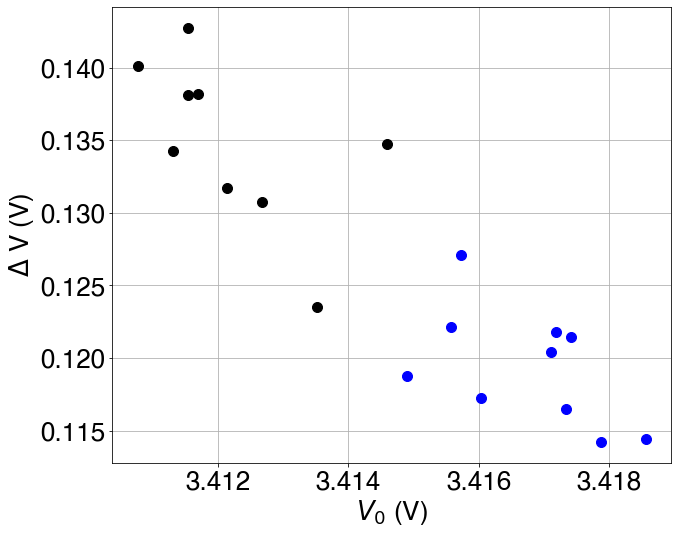

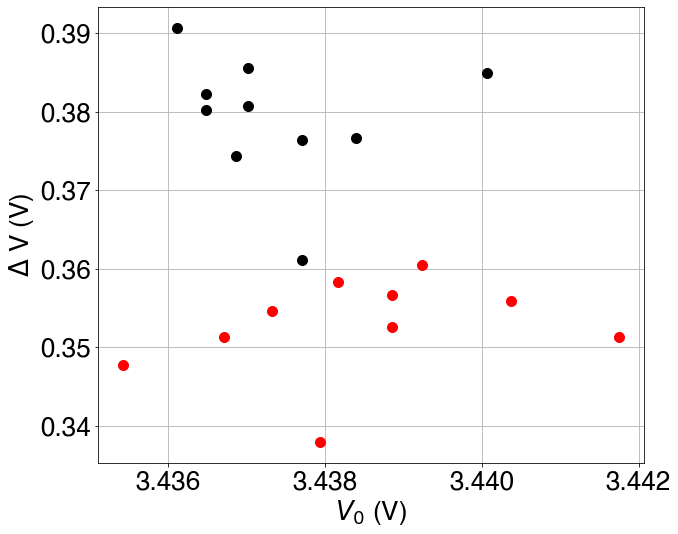

In [92]:
plt.figure()

for v0, vf, is_baseline, is_room_temp in zip(v0_list, vf_list, 
                                             is_baseline_formation_list,
                                             is_room_temp_list):
    col = 'k' if is_baseline else 'b'
    
    if is_room_temp:
        continue
        
    time = data[0]['raw_all']['Test Time (s)']
    time = time - time.iloc[0]
    voltage = data[0]['raw_all']['Potential (V)']

    plt.plot(v0, v0-vf, color=col, marker='o', markersize=10, linestyle='none')
    
plt.xlabel('$V_0$ (V)')
plt.ylabel('$\Delta$ V (V)') 

plt.figure()
    
for v0, vf, is_baseline, is_room_temp in zip(v0_list, vf_list, 
                                             is_baseline_formation_list,
                                             is_room_temp_list):

    col = 'k' if is_baseline else 'r'
    
    if not is_room_temp:
        continue
        
    time = data[0]['raw_all']['Test Time (s)']
    time = time - time.iloc[0]
    voltage = data[0]['raw_all']['Potential (V)']

    plt.plot(v0, v0-vf, color=col, marker='o', markersize=10, linestyle='none')
    
plt.xlabel('$V_0$ (V)')
plt.ylabel('$\Delta$ V (V)')    